In [22]:
import seaborn as sns
import pandas as pd
import duckdb as db

In [40]:
conn = db.connect('alvis6_with_plot.db')

In [41]:
conn.sql('show all tables')

┌──────────────────┬─────────┬─────────────────────────┬──────────────────────────────────────────────────────────────────────┬───────────────────────────────────────────────────────────────────┬───────────┐
│     database     │ schema  │          name           │                             column_names                             │                           column_types                            │ temporary │
│     varchar      │ varchar │         varchar         │                              varchar[]                               │                             varchar[]                             │  boolean  │
├──────────────────┼─────────┼─────────────────────────┼──────────────────────────────────────────────────────────────────────┼───────────────────────────────────────────────────────────────────┼───────────┤
│ alvis6_with_plot │ _temp   │ _                       │ [model, metric, rmse, days]                                          │ [VARCHAR, VARCHAR[], DOUBLE, INTEGER]   

In [42]:
data = conn.sql('select * from _temp._plot').df()

In [43]:
data

,days,rmse,model,metric
0,1,89.999424,Pangu,"[rmse, surface, msl]"
1,2,147.044414,Pangu,"[rmse, surface, msl]"
2,3,210.424121,Pangu,"[rmse, surface, msl]"
3,4,275.884744,Pangu,"[rmse, surface, msl]"
4,5,337.118473,Pangu,"[rmse, surface, msl]"
...,...,...,...,...
265,6,399.240294,SwinHPPangu,"[rmse, upper, z]"
266,7,461.870542,SwinHPPangu,"[rmse, upper, z]"
267,8,517.395975,SwinHPPangu,"[rmse, upper, z]"
268,9,565.789820,SwinHPPangu,"[rmse, upper, z]"


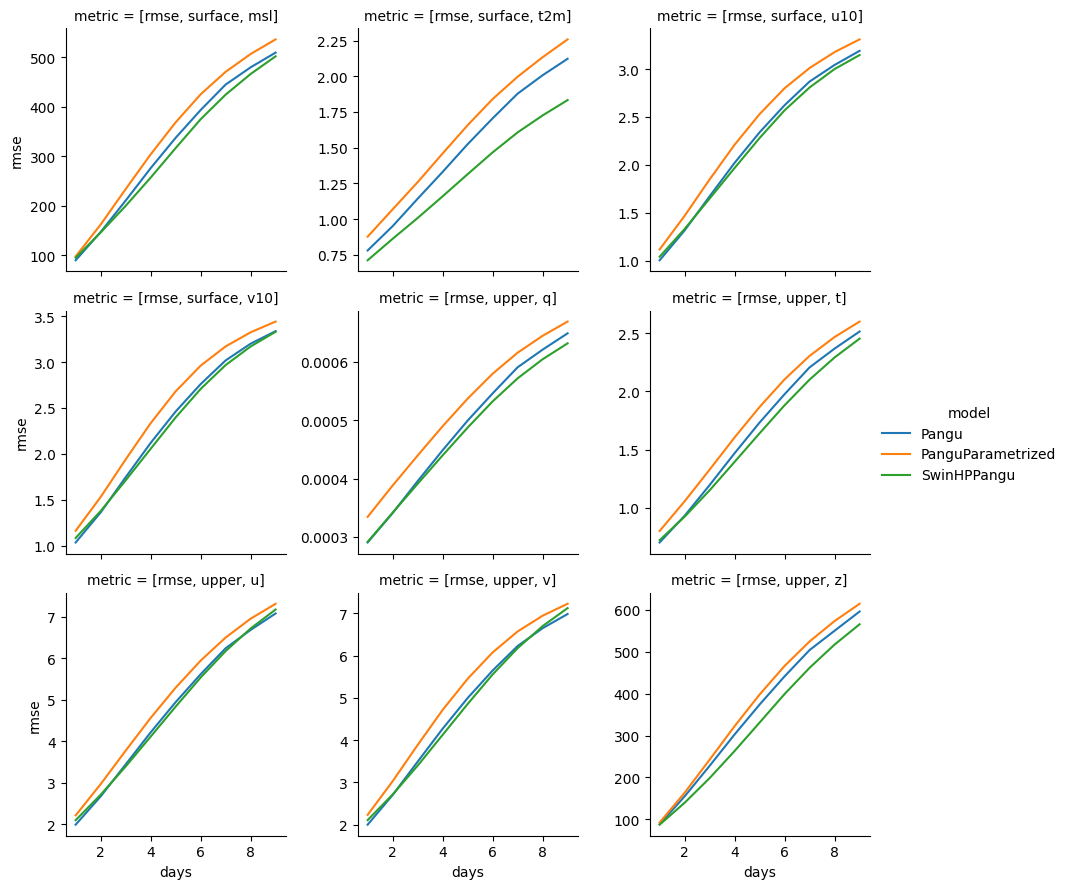

In [44]:
g = sns.FacetGrid(data, col="metric", hue="model", sharey=False, col_wrap=3)
g.map(sns.lineplot, "days", "rmse")
g.add_legend()
g.savefig('iterated.pdf')